## Image Classification using CNN

First of all import all the libraries

1. tensorflow and keras for implementing cnn models.
2. matplotlib for plotting the training and testing datasets.
3. numpy for handling datasets

Dataset is cifar-10 dataset taken from keras library

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the training and testing datasets from keras cifar10 library. 

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

Let's look at the dimensions of the datasets

In [4]:
X_train.shape

(50000, 32, 32, 3)

So, there are 5000 training examples.\
Each picture is of 32px height and 32px width.\
The picture is using rgb color channel so it has 3 dimensions for colors

In [5]:
X_test.shape

(10000, 32, 32, 3)

There are 1000 testing examples.

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

Since y_train is two dimensional array, We flatten the array by using following code.

In [22]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [8]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Now the y_train is flattened and it's now 1 dimensional array.

We define the classes for the images as 0 in y_train, y_test refers to airplane,  1 as automobile and so on according to  cifar-10 dataset.

In [9]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

The following code is for plotting the picture using matplotlib.pyplot

In [10]:
def plot_sample(X,y,index):
    plt.figure(figsize=(10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

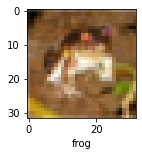

In [11]:
plot_sample(X_train,y_train,0)

The following code normalizes the dataset by dividing every element of the dataset by 255(maximum value in dataset).

In [12]:
X_train = X_train/255
X_test = X_test/255

Now, the dataset is in the range of 0-1.
### Normalizing the data makes the cost function much easier to train.
For more: [Here](https://stats.stackexchange.com/questions/185853/why-do-we-need-to-normalize-the-images-before-we-put-them-into-cnn)

Let's first use the Artificial Neural Network for the classification of the images.

Note: 
- use **loss='categorical_cross_entropy'** if you have **one hot -  encoded** array in y.
- use **loss='sparse_categorical_cross_entropy'** if you have y as index as in our dataset here **(y=2 meaning bird)** 

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 139s 88ms/step - loss: 1.8079 - accuracy: 0.3560
Epoch 2/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.6205 - accuracy: 0.4336
Epoch 3/5
1563/1563 [==============================] - 137s 88ms/step - loss: 1.5384 - accuracy: 0.4583
Epoch 4/5
1563/1563 [==============================] - 138s 88ms/step - loss: 1.4795 - accuracy: 0.4806
Epoch 5/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.4312 - accuracy: 0.4955


To evaluate the model on test sets we use the following code:

In [14]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.6981 - accuracy: 0.3953


[1.6980830430984497, 0.3953000009059906]

The accuracy is pretty low. We will later use cnn to improve the performance.

Use sklearn library to find the precision, recall, f1-score, support for every classes in the datasets.

**precision** - Out of all prediction how many you got it right.\
i.e (True Positive)/(True Positive + False Positive)\
**recall** - Out of all truth how many you got it right.\
i.e (True Positive)/(True Positive + False Negative)\
**f1-score** - Harmonic Mean of precision and recall\
i.e  2*precision*recall/(precision + recall)\
**support** - Number of samples of the true response that lie in that class.\ 

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.33      0.76      0.46      1000
           1       0.75      0.39      0.51      1000
           2       0.47      0.14      0.21      1000
           3       0.46      0.11      0.18      1000
           4       0.35      0.47      0.40      1000
           5       0.45      0.24      0.31      1000
           6       0.61      0.28      0.39      1000
           7       0.26      0.84      0.40      1000
           8       0.75      0.25      0.38      1000
           9       0.59      0.48      0.53      1000

    accuracy                           0.40     10000
   macro avg       0.50      0.40      0.38     10000
weighted avg       0.50      0.40      0.38     10000



Now we will use convolution neural network to improve the performance of our network.

**filters** represent the no of filters.\
*i.e if filters=32, this network can detect 32 different features in the image*
**kernel_size** represents the actual size of a single filter.\
**inpu_shape** refers to the size of the single training/test example.

In [19]:
cnn = models.Sequential([
    #cnn first block
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    #(2, 2) will take the max value over a 2x2 pooling window.
    layers.MaxPooling2D((2,2)),
    
    #cnn second block
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #fully connected layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5100 - accuracy: 0.4577
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1720 - accuracy: 0.5847
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0471 - accuracy: 0.6335
Epoch 4/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.9747 - accuracy: 0.6584
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9163 - accuracy: 0.6787
Epoch 6/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8692 - accuracy: 0.6977
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8272 - accuracy: 0.7128
Epoch 8/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7924 - accuracy: 0.7240
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7611 - accuracy: 0.7349
Epoch 10/10
1563/1563 [==============================] - 47s 30m

In [23]:
cnn.evaluate(X_test, y_test, 1)

10000/10000 [==============================] - 25s 2ms/step - loss: 0.9204 - accuracy: 0.6850


[0.9204038381576538, 0.6850000023841858]

The accuracy is 68.5 percentage which is significant improvement from ann.

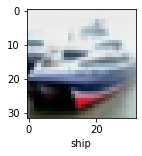

In [24]:
plot_sample(X_test, y_test, 1)

In [25]:
y_pred = cnn.predict(X_test)

In [38]:
y_pred[:5]

array([[1.9131869e-02, 7.0095516e-04, 1.8720187e-02, 8.2071471e-01,
        1.9530013e-04, 5.9014678e-02, 7.0989959e-02, 3.3602300e-05,
        3.2372761e-03, 7.2614481e-03],
       [4.3691970e-02, 5.4247469e-02, 1.9966485e-05, 1.3622426e-05,
        1.2407052e-05, 3.9512639e-07, 4.1816356e-06, 1.9819501e-08,
        9.0013558e-01, 1.8744402e-03],
       [8.0978284e-03, 6.3770592e-02, 8.0045132e-04, 1.0756365e-03,
        3.3207427e-04, 4.9663697e-05, 6.9657086e-05, 1.2352721e-04,
        9.2295003e-01, 2.7305465e-03],
       [7.0169175e-01, 9.5051397e-03, 3.2335084e-02, 3.3460839e-03,
        7.9412989e-02, 1.4947267e-04, 5.7770166e-04, 9.3252462e-04,
        1.7127529e-01, 7.7406899e-04],
       [6.3832152e-07, 1.6944998e-05, 9.6672457e-03, 1.2607011e-02,
        8.9220625e-01, 2.3420195e-03, 8.3079256e-02, 7.0515940e-05,
        6.4626634e-06, 3.6930201e-06]], dtype=float32)

The values in each element of y_pred are the probability distribution between 0 and 1 because it is using softmax.

To find out which index has max probability of occurence for each prediction, We use:

In [39]:
y_classes=[np.argmax(element) for element in y_pred]

In [40]:
y_classes[:5]

[3, 8, 8, 0, 4]

In [41]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [47]:
classes[y_classes[10]]

'airplane'

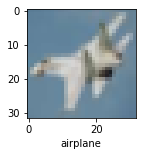

In [46]:
plot_sample(X_test,y_test,10)

In [48]:
print('Classification Report: \n', classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.76      0.75      1000
           1       0.84      0.74      0.79      1000
           2       0.53      0.58      0.55      1000
           3       0.53      0.44      0.48      1000
           4       0.63      0.59      0.61      1000
           5       0.61      0.60      0.61      1000
           6       0.75      0.77      0.76      1000
           7       0.67      0.78      0.72      1000
           8       0.79      0.80      0.79      1000
           9       0.77      0.78      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.69      0.68     10000

